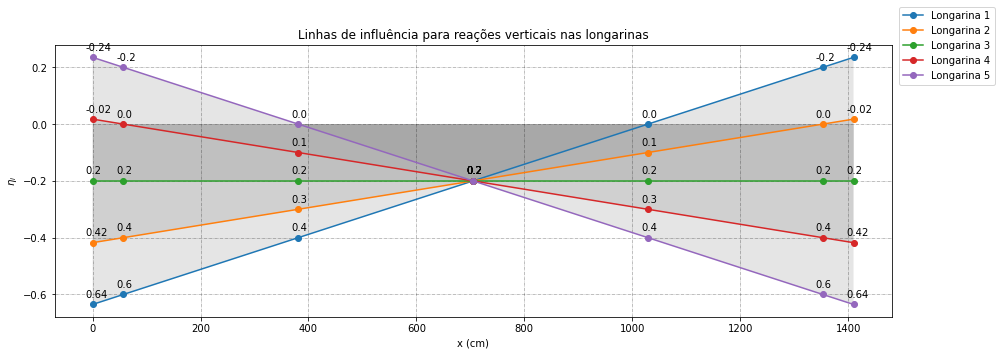

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def Engesser_Coubon(n, xi, e, i):
    eta = (1/n)*(1+6*((2*i-n-1)*(e))/((n**2-1)*xi))
    return eta
#------------------------------------------------------
#ENTRADA DE DADOS
#------------------------------------------------------
n = 5   #número de longarinas
xi=324  #espaçamento entre longarinas
lesq=57 #balanço à esquerda
ldir=57 #balanço à direitra

#------------------------------------------------------
#CÁLCULO
#------------------------------------------------------
lint=(n-1)*xi
l=lesq + lint + ldir
e=np.zeros(n+2)
e[0]=-lint/2 - lesq
e[len(e)-1]=lint/2 + ldir
eta=np.zeros([n+2,n])


#vetor de excentricidades
#------------------------------------------------------
for j in range(n): 
    e[j+1]=-(lint/2)+(j)*xi

#vetor x
#------------------------------------------------------
x=np.zeros(len(e))
x[1]=lesq
x[len(e)-1]=l
for j in range(1,n): 
    x[j+1]=lesq+(j)*xi

#Coeficientes
#------------------------------------------------------
for j in range(1,n+1):  
    for k in range(len(e)):
        eta[k,j-1]=Engesser_Coubon(n, xi, e[k], j)

        
#------------------------------------------------------
#RESULTADOS
#------------------------------------------------------
fig, linha_inf = plt.subplots(figsize = (15,5))
for j in range(n):
    linha_inf.plot(x,-eta[:,j], label = 'Longarina %i' % int(j+1), marker ='o', )
    linha_inf.fill_between(x,-eta[:,j], facecolor = 'grey',  alpha=0.2)
    for j, v in enumerate(eta[:,j]):
        linha_inf.annotate(str(round(v,2)), xy=(x[j],-v), xytext=(-7,7), textcoords = 'offset points')
#linha_inf.anotate('', xy=(0,0), xytext=(0,0), arrowprops=dict(arrowstyle='<->', connectionstyle='arc3,rad=0.2'))
linha_inf.grid(linewidth=0.5, linestyle='-.', color='k', alpha=0.5)
linha_inf.legend(bbox_to_anchor=(1, 1),
          bbox_transform=fig.transFigure)
linha_inf.set_xlabel('x (cm)')
linha_inf.set_ylabel('$\eta_{i}$')
linha_inf.set_title('Linhas de influência para reações verticais nas longarinas');


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def linha_inf(n, xi, lesq, ldir, i):
    lint=(n-1)*xi
    l=lesq + lint + ldir
    e=np.zeros(n+2)
    e[0]=-lint/2 - lesq
    e[len(e)-1]=lint/2 + ldir
    eta=np.zeros([n+2,n])
    for j in range(n): 
        e[j+1]=-(lint/2)+(j)*xi
    
    x=np.zeros(len(e))
    x[1]=lesq
    x[len(e)-1]=l
    for j in range(1,n): 
        x[j+1]=lesq+(j)*xi
    eta = (1/n)*(1+6*((2*i-n-1)*(e))/((n**2-1)*xi))
    fig, linha_inf = plt.subplots(figsize = (15,5))
    linha_inf.plot(x,-eta, label = 'Longarina %i' % int(i+1), marker ='o', )
    linha_inf.fill_between(x,-eta, facecolor = 'grey',  alpha=0.2)
    for j, v in enumerate(eta):
        linha_inf.annotate(str(round(v,2)), xy=(x[j],-v), xytext=(-7,7), textcoords = 'offset points')
    linha_inf.grid(linewidth=0.5, linestyle='-.', color='k', alpha=0.5)
    linha_inf.legend(bbox_to_anchor=(1, 1),
            bbox_transform=fig.transFigure)
    linha_inf.set_xlabel('x (cm)')
    linha_inf.set_ylabel('$\eta_{i}$')
    linha_inf.set_title('Linha de influência para a reação vertical na longarina %i' % int(i))
    return x, eta

import ipywidgets as widgets
from ipywidgets import interactive
interactive(
    linha_inf,
    n = widgets.IntSlider(min=2, max=12, step=1, value=2),
    xi = widgets.FloatSlider(min=1, max=10, step=0.1, value=3),
    lesq = widgets.FloatSlider(min=0, max=10, step=0.1, value=0),
    ldir = widgets.FloatSlider(min=0, max=10, step=0.1, value=0),
    i = widgets.IntSlider(min=1, max=12, step=1, value=1),
)


interactive(children=(IntSlider(value=2, description='n', max=12, min=2), FloatSlider(value=3.0, description='…